In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# for encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler

# for the yeo-johnson transformation
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

# for model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# for checking model accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)


In [2]:
import os
ROOT_PATH = r"D:\Vaidehi\NMIMS\course-24-bootcamp\Problem Statement 2\Data\Train_data"


df_1 = pd.read_csv("Insurance_Claim_Info_data.csv")
df_2 = pd.read_csv( r"Insurance_Date_data.csv")
df_3 = pd.read_csv("Insurance_Result_data.csv")

In [11]:
combined = df_1.merge(df_2, left_on='Claim Number', right_on='Claim Number').merge(df_3,left_on='Claim Number', right_on='Claim Number')

In [12]:
# combined=pd.read_excel('Combined.xlsx')

In [13]:
combined.shape

(34110, 12)

In [14]:
combined['Disposition'].value_counts()

Deny               17848
Approve in Full     9052
Settle              7210
Name: Disposition, dtype: int64

In [10]:
# denied_df = combined[combined['Disposition']=='Deny'][:7210]
# approved_df = combined[combined['Disposition']=='Approve in Full'][:7210]
# settled_df = combined[combined['Disposition']=='Settle']
# final_df = pd.concat([settled_df,denied_df, approved_df],axis=0)
# final_df = final_df.sample(frac=1).reset_index(drop=True)
# final_df

In [193]:
# final_df['Product Insured'].value_counts()

<AxesSubplot: xlabel='Disposition', ylabel='count'>

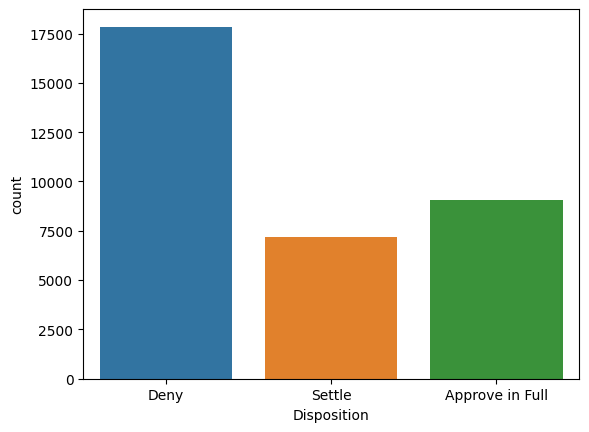

In [194]:
sns.countplot(x = 'Disposition', data = combined)

In [5]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34110 entries, 0 to 34109
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Claim Number     34109 non-null  object        
 1   City Code        34109 non-null  object        
 2   City             34109 non-null  object        
 3   Enterprise Type  34109 non-null  object        
 4   Claim Type       34109 non-null  object        
 5   Claim Site       34109 non-null  object        
 6   Product Insured  34109 non-null  object        
 7   Incident Date    34109 non-null  datetime64[ns]
 8   Date Received    34109 non-null  datetime64[ns]
 9   Claim Amount     34109 non-null  float64       
 10  Close Amount     34109 non-null  float64       
 11  Disposition      34109 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 3.1+ MB


In [6]:
combined['Days Difference'] = (combined['Date Received'] - combined['Incident Date']).dt.days

In [195]:
combined

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-07-06,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-12-05,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-08-12,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2007-01-08,2007-01-16,7.00,0.00,Deny
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle


In [15]:
combined.isnull().sum()

Claim Number       0
City Code          0
City               0
Enterprise Type    0
Claim Type         0
Claim Site         0
Product Insured    0
Incident Date      0
Date Received      0
Claim Amount       0
Close Amount       0
Disposition        0
dtype: int64

In [16]:
# abs(final_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1))

In [17]:
combined.drop([ 'Claim Number','Incident Date','Date Received'],axis=1,inplace=True)

In [18]:
combined.head()

,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Claim Amount,Close Amount,Disposition
0,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,490.00,0.00,Deny
1,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,300.00,150.00,Settle
2,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,83.98,83.98,Approve in Full
3,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,507.88,0.00,Deny
4,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,83.46,41.73,Settle


In [19]:
# final_df['Disposition'] = final_df['Disposition'].apply(lambda x: 0 if x == 'Deny' else (1 if x == 'Settle' else 2))
# final_df  

In [20]:
combined['Disposition'] = combined['Disposition'].apply(lambda x: 0 if x == 'Deny' else (1 if x == 'Settle' else 2))
combined

,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Claim Amount,Close Amount,Disposition
0,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,490.00,0.00,0
1,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,300.00,150.00,1
2,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,83.98,83.98,2
3,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,507.88,0.00,0
4,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,83.46,41.73,1
...,...,...,...,...,...,...,...,...,...
34105,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,238.00,115.60,1
34106,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,7.00,0.00,0
34107,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,166.00,70.00,1
34108,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,450.00,280.00,1


In [21]:
combined

,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Claim Amount,Close Amount,Disposition
0,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,490.00,0.00,0
1,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,300.00,150.00,1
2,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,83.98,83.98,2
3,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,507.88,0.00,0
4,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,83.46,41.73,1
...,...,...,...,...,...,...,...,...,...
34105,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,238.00,115.60,1
34106,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,7.00,0.00,0
34107,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,166.00,70.00,1
34108,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,450.00,280.00,1


In [22]:
# final_df[final_df['Disposition']==0][['Enterprise Type', 'Claim Type', 'Claim Site']]

In [23]:
# final_df[final_df['Disposition']==0]['Enterprise Type'].value_counts()

In [24]:
# x = final_df.drop(['Disposition'], axis = 1)
# y = final_df['Disposition']

In [25]:
x = combined.drop(['Disposition'], axis = 1)
y = combined['Disposition']

In [26]:
x['Product Insured'].value_counts() 

Inventory - Raw Material                                    8110
Misc. Electronic Items                                      5611
Misc. Engineering Tools                                     4247
Inventory - Finished Goods                                  3322
Furniture                                                   3034
Misc. Electrical Equipment                                  2945
Heating, ventilation, and air conditioning (HVAC) System    2787
Fixtures                                                    1065
Pumps and Motors                                            1025
Misc. Lab Equipment                                          695
Misc. Sensors                                                579
Property, Plant, and Equipment (PPE) Parts                   347
Cameras and other Misc. Security Equipment                   343
Name: Product Insured, dtype: int64

In [96]:
y

0        2
1        0
2        2
3        0
4        2
        ..
21625    1
21626    2
21627    2
21628    0
21629    0
Name: Disposition, Length: 21630, dtype: int64

In [27]:
cat_vars = ['City Code','City','Enterprise Type','Claim Type','Claim Site','Product Insured']

In [28]:
temp_df=pd.get_dummies(data=x, columns=cat_vars,drop_first=True)

In [29]:
temp_df_2 = pd.concat([temp_df, y],axis=1)

In [30]:
"Disposition" in temp_df_2.corr().index.values.tolist()

True

In [31]:
abs(temp_df_2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1))

,Claim Amount,Close Amount,City Code_AMD,City Code_ATQ,City Code_BDQ,City Code_BHO,City Code_BLR,City Code_BOM,City Code_CCU,City Code_CJB,City Code_DEL,City Code_HYD,City Code_IDR,City Code_JAI,City Code_KNU,City Code_LKO,City Code_MAA,City Code_NGP,City Code_NSK,City Code_PAT,City Code_PNQ,City Code_STV,City Code_THN,City Code_VSK,City_Ahmedabad,City_Amritsar,City_Bangalore,City_Bhopal,City_Chennai,City_Coimbatore,City_Delhi,City_Hyderabad,City_Indore,City_Jaipur,City_Kanpur,City_Kolkata,City_Lucknow,City_Mumbai,City_Nagpur,City_Nashik,City_Patna,City_Pune,City_Surat,City_Thane,City_Vadodara,City_Visakhapatnam,Enterprise Type_Foreign Subsidary,Enterprise Type_Joint-Venture Company,Enterprise Type_Limited Liability Parterneship (LLP),Enterprise Type_Non-Profit Organization (NPO),Enterprise Type_One Person Company,Enterprise Type_Partnership Firm,Enterprise Type_Private Limited Company,Enterprise Type_Private Ltd. MSME - Medium,Enterprise Type_Private Ltd. MSME - Micro,Enterprise Type_Private Ltd. MSME - Small,Enterprise Type_Public Limited Company,Enterprise Type_Sole Proprietorship,Claim Type_Property Loss,Claim Site_Other,Claim Site_Warehouse,Product Insured_Fixtures,Product Insured_Furniture,"Product Insured_Heating, ventilation, and air conditioning (HVAC) System",Product Insured_Inventory - Finished Goods,Product Insured_Inventory - Raw Material,Product Insured_Misc. Electrical Equipment,Product Insured_Misc. Electronic Items,Product Insured_Misc. Engineering Tools,Product Insured_Misc. Lab Equipment,Product Insured_Misc. Sensors,"Product Insured_Property, Plant, and Equipment (PPE) Parts",Product Insured_Pumps and Motors,Disposition
Claim Amount,1.000000,0.440843,0.016747,0.014041,0.012993,0.001836,0.005178,0.017024,0.008319,0.008776,0.011018,0.004332,0.006067,0.001900,0.000756,0.001086,0.000747,0.000155,0.004363,0.004016,0.009961,0.007689,0.000842,0.001506,0.016747,0.014041,0.005178,0.001836,0.000747,0.008776,0.011018,0.004332,0.006067,0.001900,0.000756,0.008319,0.001086,0.017024,0.000155,0.004363,0.004016,0.009961,0.007689,0.000842,0.012993,0.001506,0.003518,0.000647,0.000790,0.015501,0.010439,0.012390,0.004254,0.005479,0.018416,0.004838,0.007025,0.008165,0.083305,0.011060,0.007665,0.031166,0.096026,0.028123,0.040013,0.006308,0.084010,0.112017,0.025302,0.063651,0.005295,0.009255,0.006790,0.022863
Close Amount,0.440843,1.000000,0.033385,0.010285,0.001329,0.002105,0.016331,0.001479,0.010199,0.005003,0.005374,0.023598,0.002533,0.028253,0.005458,0.002088,0.010731,0.005757,0.006075,0.006111,0.001426,0.005215,0.006993,0.002833,0.033385,0.010285,0.016331,0.002105,0.010731,0.005003,0.005374,0.023598,0.002533,0.028253,0.005458,0.010199,0.002088,0.001479,0.005757,0.006075,0.006111,0.001426,0.005215,0.006993,0.001329,0.002833,0.025814,0.000663,0.000247,0.012797,0.003799,0.004481,0.001980,0.017807,0.019686,0.007735,0.002024,0.010010,0.023452,0.000174,0.052562,0.003449,0.026871,0.026957,0.007221,0.042812,0.059409,0.097450,0.001689,0.051034,0.008161,0.015860,0.050364,0.453405
City Code_AMD,0.016747,0.033385,1.000000,0.037372,0.040029,0.042885,0.059416,0.065104,0.050399,0.043662,0.062229,0.058338,0.044872,0.047702,0.046431,0.051442,0.053016,0.046395,0.039785,0.041469,0.052404,0.049271,0.043285,0.041390,1.000000,0.037372,0.059416,0.042885,0.053016,0.043662,0.062229,0.058338,0.044872,0.047702,0.046431,0.050399,0.051442,0.065104,0.046395,0.039785,0.041469,0.052404,0.049271,0.043285,0.040029,0.041390,0.037280,0.009749,0.027158,0.044752,0.025216,0.003313,0.035244,0.016847,0.438052,0.001372,0.047339,0.060513,0.000445,0.010543,0.019050,0.002972,0.005454,0.008995,0.011938,0.029405,0.002444,0.016874,0.012951,0.003369,0.004935,0.011824,0.003831,0.043428
City Code_ATQ,0.014041,0.010285,0.037372,1.000000,0.028663,0.030707,0.042544,0.046617,0.036088,0.031264,0.044559,0.041772,0.032130,0.034157,0.033246,0.036835,0.037961,0.033221,0.028488,0.029693,0.037523,0.035280,0.030993,0.029637,0.037372,1.000000,0.042544,0.030707,0.037961,0.031264,0.044559,0

In [159]:
round(abs(temp_df_2.corr()),2)['Disposition'].sort_values(ascending=False)


Disposition                                            1.00
Product Insured_Furniture                              0.11
Product Insured_Inventory - Raw Material               0.10
Product Insured_Misc. Electrical Equipment             0.09
Product Insured_Inventory - Finished Goods             0.08
                                                       ... 
Enterprise Type_Private Ltd. MSME - Small              0.00
City_Bhopal                                            0.00
City_Bangalore                                         0.00
Enterprise Type_Limited Liability Parterneship (LLP)   0.00
City Code_PAT                                          0.00
Name: Disposition, Length: 74, dtype: float64

In [125]:
temp_df_2.columns

Index(['Claim Amount', 'Close Amount', 'Days Difference', 'City Code_AMD',
       'City Code_ATQ', 'City Code_BDQ', 'City Code_BHO', 'City Code_BLR',
       'City Code_BOM', 'City Code_CCU', 'City Code_CJB', 'City Code_DEL',
       'City Code_HYD', 'City Code_IDR', 'City Code_JAI', 'City Code_KNU',
       'City Code_LKO', 'City Code_MAA', 'City Code_NGP', 'City Code_NSK',
       'City Code_PAT', 'City Code_PNQ', 'City Code_STV', 'City Code_THN',
       'City Code_VSK', 'City_Ahmedabad', 'City_Amritsar', 'City_Bangalore',
       'City_Bhopal', 'City_Chennai', 'City_Coimbatore', 'City_Delhi',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kanpur',
       'City_Kolkata', 'City_Lucknow', 'City_Mumbai', 'City_Nagpur',
       'City_Nashik', 'City_Patna', 'City_Pune', 'City_Surat', 'City_Thane',
       'City_Vadodara', 'City_Visakhapatnam',
       'Enterprise Type_Foreign Subsidary',
       'Enterprise Type_Joint-Venture Company',
       'Enterprise Type_Limited Liability Parter

In [160]:
x

,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Claim Amount,Close Amount
0,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,490.00,0.00
1,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,300.00,150.00
2,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,83.98,83.98
3,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,507.88,0.00
4,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,83.46,41.73
...,...,...,...,...,...,...,...,...
34105,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,238.00,115.60
34106,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,7.00,0.00
34107,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,166.00,70.00
34108,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,450.00,280.00


In [33]:
X_train, X_test, y_train, y_test = train_test_split(temp_df, y, test_size =0.3, stratify = y, random_state=120)

In [36]:
X_train.isnull().sum().sort_values(ascending=False)

Claim Amount                                  0
City_Mumbai                                   0
Enterprise Type_Private Ltd. MSME - Medium    0
Enterprise Type_Private Limited Company       0
Enterprise Type_Partnership Firm              0
                                             ..
City_Ahmedabad                                0
City Code_VSK                                 0
City Code_THN                                 0
City Code_STV                                 0
Product Insured_Pumps and Motors              0
Length: 73, dtype: int64

In [37]:
# 2. support vector machine
svc = SVC()

# Train Classifer
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svc.predict(X_test)
sva=accuracy_score(y_test, y_pred)
print("support vector machine Model Accuracy:", sva)

support vector machine Model Accuracy: 0.8310368415909313


In [40]:
confusion_matrix(y_test, y_pred)

array([[5275,    0,   79],
       [1152,  673,  338],
       [ 159,    1, 2556]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      5354
           1       1.00      0.31      0.47      2163
           2       0.86      0.94      0.90      2716

    accuracy                           0.83     10233
   macro avg       0.89      0.75      0.75     10233
weighted avg       0.86      0.83      0.80     10233



In [41]:
import pickle

In [42]:
with open("svc_model.pkl", 'wb') as model_file:
    pickle.dump(svc, model_file)

In [43]:
with open("svc_model.pkl", "rb") as infile:
    svc_model = pickle.load(infile)

In [47]:
x.columns.tolist()

['City Code',
 'City',
 'Enterprise Type',
 'Claim Type',
 'Claim Site',
 'Product Insured',
 'Claim Amount',
 'Close Amount']

In [110]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [116]:
from lazypredict.Supervised import LazyClassifier
temp_model = LazyClassifier()

In [119]:
temp_model.fit(X_train ,X_test,y_train, y_test)

  7%|▋         | 2/29 [00:01<00:17,  1.58it/s]/usr/share/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/share/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/share/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/share/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/share/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 38%|███▊      | 11/29 [00:48<00:48,  2.71s/it]/usr/share/anacon

(                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
 Model                                                                          
 XGBClassifier                      0.99               0.99    None      0.99   
 LGBMClassifier                     0.98               0.98    None      0.98   
 BaggingClassifier                  0.98               0.98    None      0.98   
 DecisionTreeClassifier             0.97               0.97    None      0.97   
 RandomForestClassifier             0.92               0.92    None      0.92   
 AdaBoostClassifier                 0.90               0.90    None      0.90   
 LogisticRegression                 0.80               0.80    None      0.79   
 LinearSVC                          0.75               0.75    None      0.75   
 ExtraTreesClassifier               0.75               0.75    None      0.75   
 SGDClassifier                      0.73               0.73    None      0.73   
 CalibratedClassifierCV     

In [121]:
# 2. XGBoost
XGB = XGBClassifier()

# Train Classifer
XGB.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = XGB.predict(X_test)
xga=accuracy_score(y_test, y_pred)
print("support vector machine Model Accuracy:", xga)

support vector machine Model Accuracy: 0.9853598397287717


In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2163
           1       0.99      0.98      0.98      2163
           2       0.97      0.99      0.98      2163

    accuracy                           0.99      6489
   macro avg       0.99      0.99      0.99      6489
weighted avg       0.99      0.99      0.99      6489



In [ ]:
models = {"KNN":KNeighborsClassifier(),
          "Deciion Tree": DecisionTreeClassifier(),
          "SVC":SVC(),
          "Logistic Regresion": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
          "Adaboost": AdaBoostClassifier(),
          "Gradient Boosting": GradientBoostingClassifier()}